<a href="https://colab.research.google.com/github/Kaushal-DCU-2023-25/CA683I_DA_AM_Assignment/blob/main/Kaushal_2024_CA683I_DA_AM_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!pip install -U -q PyDrive2

from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import numpy as np
import pandas as pd

#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#To plot the graph embedded in the notebook
%matplotlib inline

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

### Data visualization
- Heat map
- Box plot
- Central Tendency
- Statistical test between 2015 and 2021 data (chi square test)-

In [18]:
import pandas as pd
import numpy as np

# Read files
file_diabeties = drive.CreateFile({'id':'1MjAoJU98qHEd3NG6ohXdSPTnhHsG12cX'})
file_diabeties.GetContentFile('diabetes_012_health_indicators_BRFSS2015.csv')
df_brfss15_ubal = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

#https://drive.google.com/file/d/1Grz0fdjypwBTBN8GchZ_mh-_aTYNdmBb/view?usp=drive_link
file_diabeties2 = drive.CreateFile({'id':'1Grz0fdjypwBTBN8GchZ_mh-_aTYNdmBb'})
file_diabeties2.GetContentFile('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df_brfss15_bal = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

#https://drive.google.com/file/d/10rkY6BdjNl9MInFViO0FX1NPsfmkQ_2t/view?usp=drive_link
file_diabeties3 = drive.CreateFile({'id':'10rkY6BdjNl9MInFViO0FX1NPsfmkQ_2t'})
file_diabeties3.GetContentFile('diabetes_012_health_indicators_BRFSS2021.csv')
df_brfss21_ubal = pd.read_csv('diabetes_012_health_indicators_BRFSS2021.csv')

#https://drive.google.com/file/d/1MeSXN4dxq-_YM-NwnEDELQJJYOa0IxGJ/view?usp=drive_link
file_diabeties4 = drive.CreateFile({'id':'1MeSXN4dxq-_YM-NwnEDELQJJYOa0IxGJ'})
file_diabeties4.GetContentFile('diabetes_binary_5050split_health_indicators_BRFSS2021.csv')
df_brfss21_bal = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2021.csv')



In [19]:
df_brfss = pd.concat([df_brfss15_bal, df_brfss21_bal], axis=0).reset_index(drop=True)
#0 = no diabetes 1 = prediabetes 2 = diabetes
#df_brfss.describe()
#df_brfss = df_brfss.rename(columns={"Diabetes_012": "Diabetes"})
df_brfss = df_brfss.rename(columns={"Diabetes_binary": "Diabetes"})
print(df_brfss['Diabetes'].unique())
df_brfss.head()


[0. 1.]


,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [20]:
import matplotlib.pyplot as plt
import math

def plot_columns(data, col_names, col_count_in_one_row=5, size=(20, 8), color='blue'):
    """
    This menthod will plot dataframes fields in n columns
    """

    total_row = math.ceil(len(col_names)/col_count_in_one_row)
    fig, ax = plt.subplots(total_row, col_count_in_one_row, figsize=size)

    col_index = 0;
    for i in range(total_row):
        for j in range(col_count_in_one_row):
            if col_index >= len(col_names):
                continue
            if total_row == 1:
                data[col_names[col_index]].plot(title = col_names[col_index], kind='hist', ax=ax[j], color=color)
            else:
                data[col_names[col_index]].plot(title = col_names[col_index], kind='hist', ax=ax[i, j], color=color)
            col_index = col_index+1

    plt.subplots_adjust(wspace=0.3,  hspace=0.4)
    plt.show()


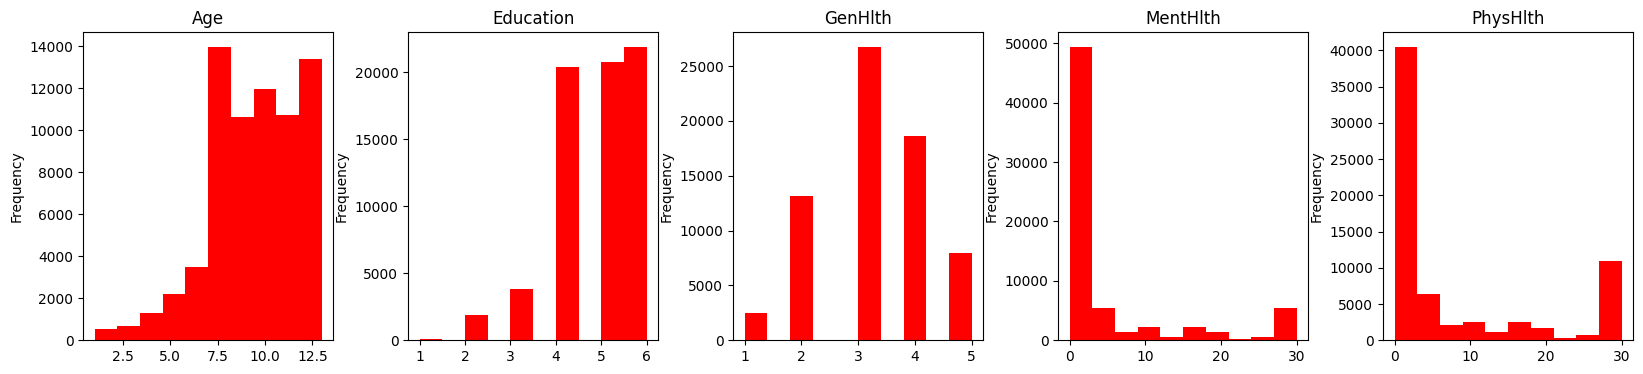

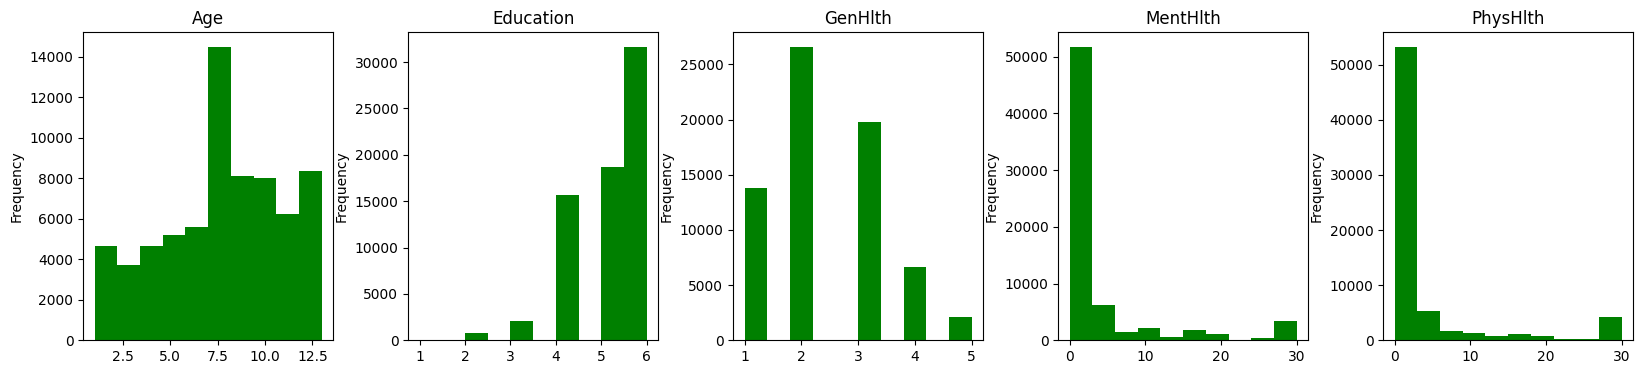

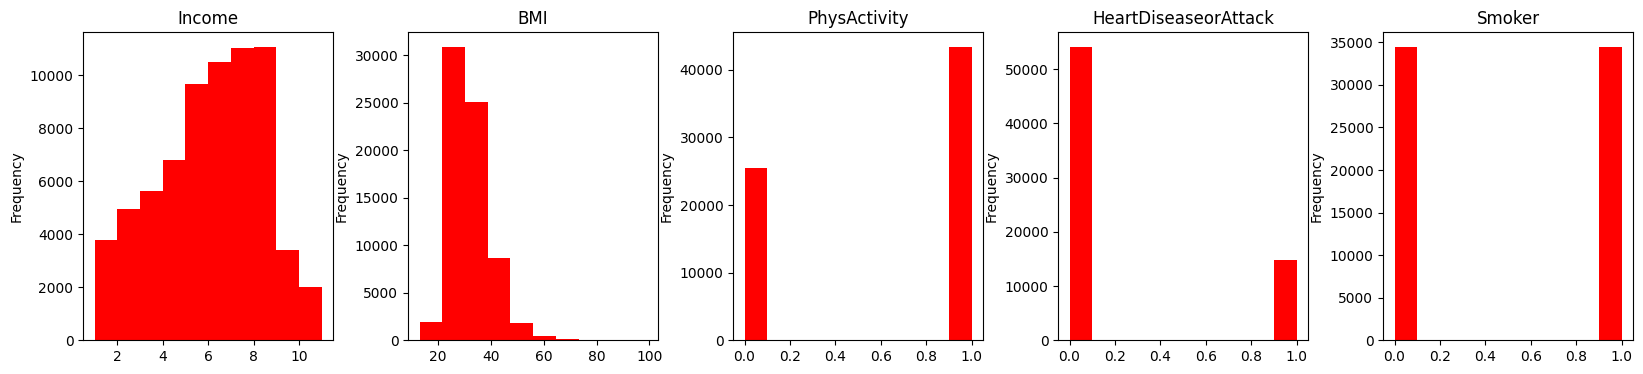

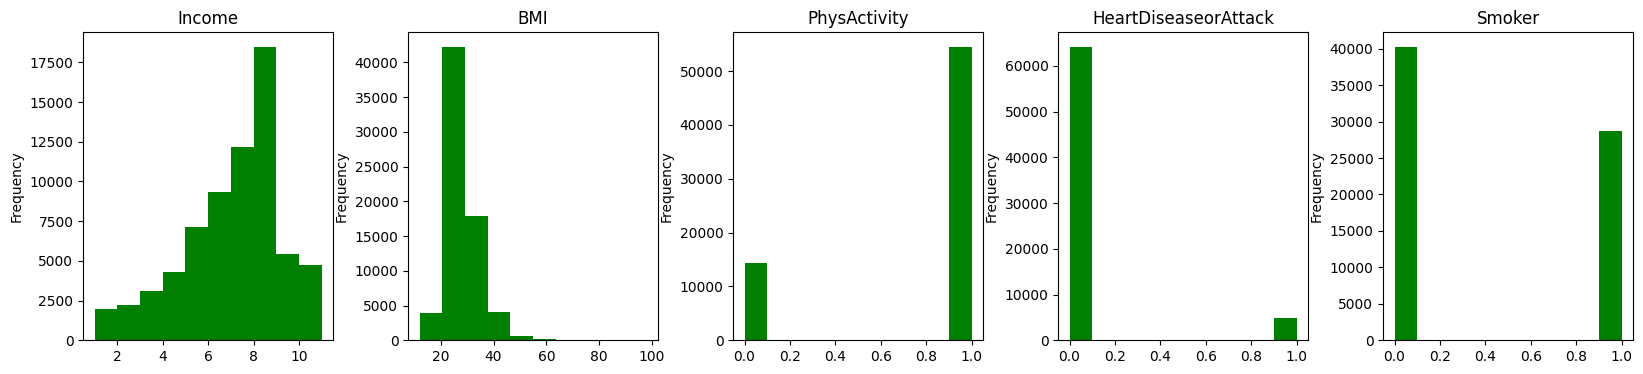

In [21]:
plot_columns(df_brfss[df_brfss['Diabetes'] == 1],  ['Age', 'Education', 'GenHlth', 'MentHlth', 'PhysHlth'], col_count_in_one_row=5, size=(20, 4), color='RED')
plot_columns(df_brfss[df_brfss['Diabetes'] == 0],  ['Age', 'Education', 'GenHlth', 'MentHlth', 'PhysHlth'], col_count_in_one_row=5, size=(20, 4), color='GREEN')
plot_columns(df_brfss[df_brfss['Diabetes'] == 1], ['Income', 'BMI', 'PhysActivity', 'HeartDiseaseorAttack', 'Smoker'], col_count_in_one_row=5, size=(20, 4), color='RED')
plot_columns(df_brfss[df_brfss['Diabetes'] == 0], ['Income', 'BMI', 'PhysActivity', 'HeartDiseaseorAttack', 'Smoker'], col_count_in_one_row=5, size=(20, 4), color='GREEN')

In [22]:
import matplotlib.pyplot as plt
import math

def scatter_plot_columns(data, main_col, col_names, col_count_in_one_row=5, size=(20, 8)):
    """
    This menthod will plot dataframes fields in n columns
    """

    total_row = math.ceil(len(col_names)/col_count_in_one_row)
    fig, ax = plt.subplots(total_row, col_count_in_one_row, figsize=size)

    col_index = 0;
    for i in range(total_row):
        for j in range(col_count_in_one_row):
            if col_index >= len(col_names):
                continue
            data.plot.scatter(title = col_names[col_index], x = main_col , y = col_names[col_index], ax=ax[i,j])
            col_index = col_index+1

    plt.subplots_adjust(wspace=0.3,  hspace=0.4)
    plt.show()

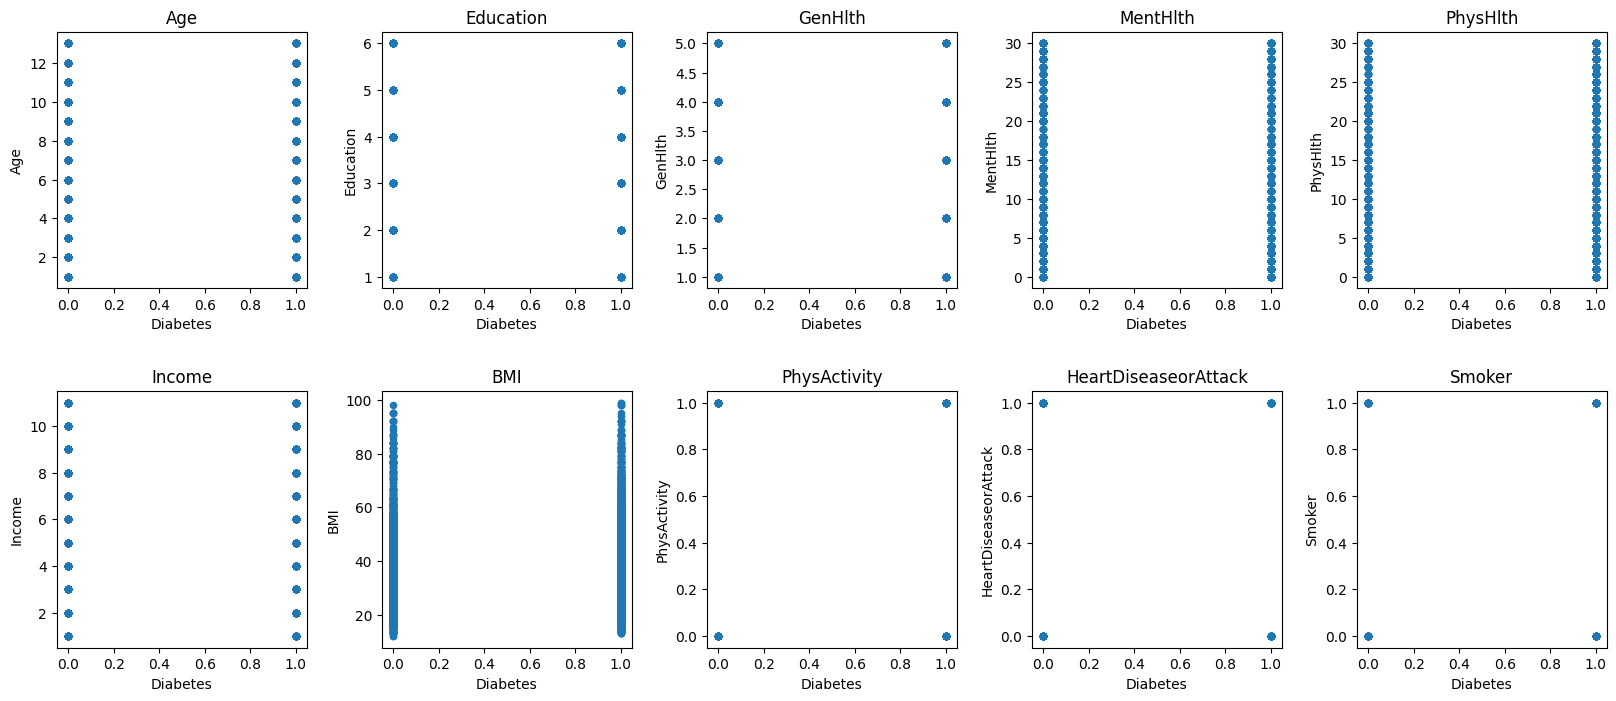

In [23]:
scatter_plot_columns(df_brfss, 'Diabetes', ['Age', 'Education', 'GenHlth', 'MentHlth',	'PhysHlth', 'Income', 'BMI', 'PhysActivity', 'HeartDiseaseorAttack', 'Smoker'])

## Preprocess the data
   - Missing data imputation
   - Outlier detection and imputation
       - multivariate vs univariate
   - Normalise data is required



## Feature engineering
   - Perform multicollinearltiy analysis
   - VIF calculation (VIF > 10, then drop)
   - Feature selection using Lasso regression


Calculated VIF, none of the VIF is > 10, hence no need to drop

In [24]:
# Diagonal elements in the table
df_brfss_cor = df_brfss.corr()
#pd.DataFrame(np.linalg.inv(df_brfss.corr().values), index = df_brfss_cor.index, columns=df_brfss_cor.columns)

#VIF is not > 10
print(np.diag(np.linalg.inv(df_brfss.corr().values)))

# No Is null values, hence  not imputing anything
print("Number of null values")
print(df_brfss.isnull().sum())

print("Duplicates count")
print(df_brfss.duplicated().sum())

df_brfss.drop_duplicates(inplace=True)

print("Duplicates count after dropping duplicate")
print(df_brfss.duplicated().sum())

print(df_brfss.columns)

# Remove outliers from BMI
cols_to_remove_outlier = ['BMI']
qtr_1 = df_brfss[cols_to_remove_outlier].quantile(0.25)
qtr_3 = df_brfss[cols_to_remove_outlier].quantile(0.75)
IQR = qtr_3 - qtr_1
max_iqr_range = 1.5 # Ideal distribution it 100 percentile will be 1.33 of 75th percentile (100/75), so adding some buffer
df = df_brfss[~((df_brfss[cols_to_remove_outlier] < (qtr_1 - max_iqr_range * IQR)) | (df_brfss[cols_to_remove_outlier] > (qtr_3 + max_iqr_range * IQR))).any(axis=1)]

[1.43268187 1.3853196  1.18922096 1.04024292 1.22304907 1.08553274
 1.0851342  1.18609873 1.19122118 1.08805446 1.09311883 1.02703177
 1.10447901 1.13866583 1.9217241  1.24913782 1.6659354  1.55838821
 1.08816456 1.39621584 1.31037627 1.51730972]
Number of null values
Diabetes                0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
Duplicates count
3273
Duplicates count after dropping duplicate
0
Index(['Diabetes', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'S

<Axes: >

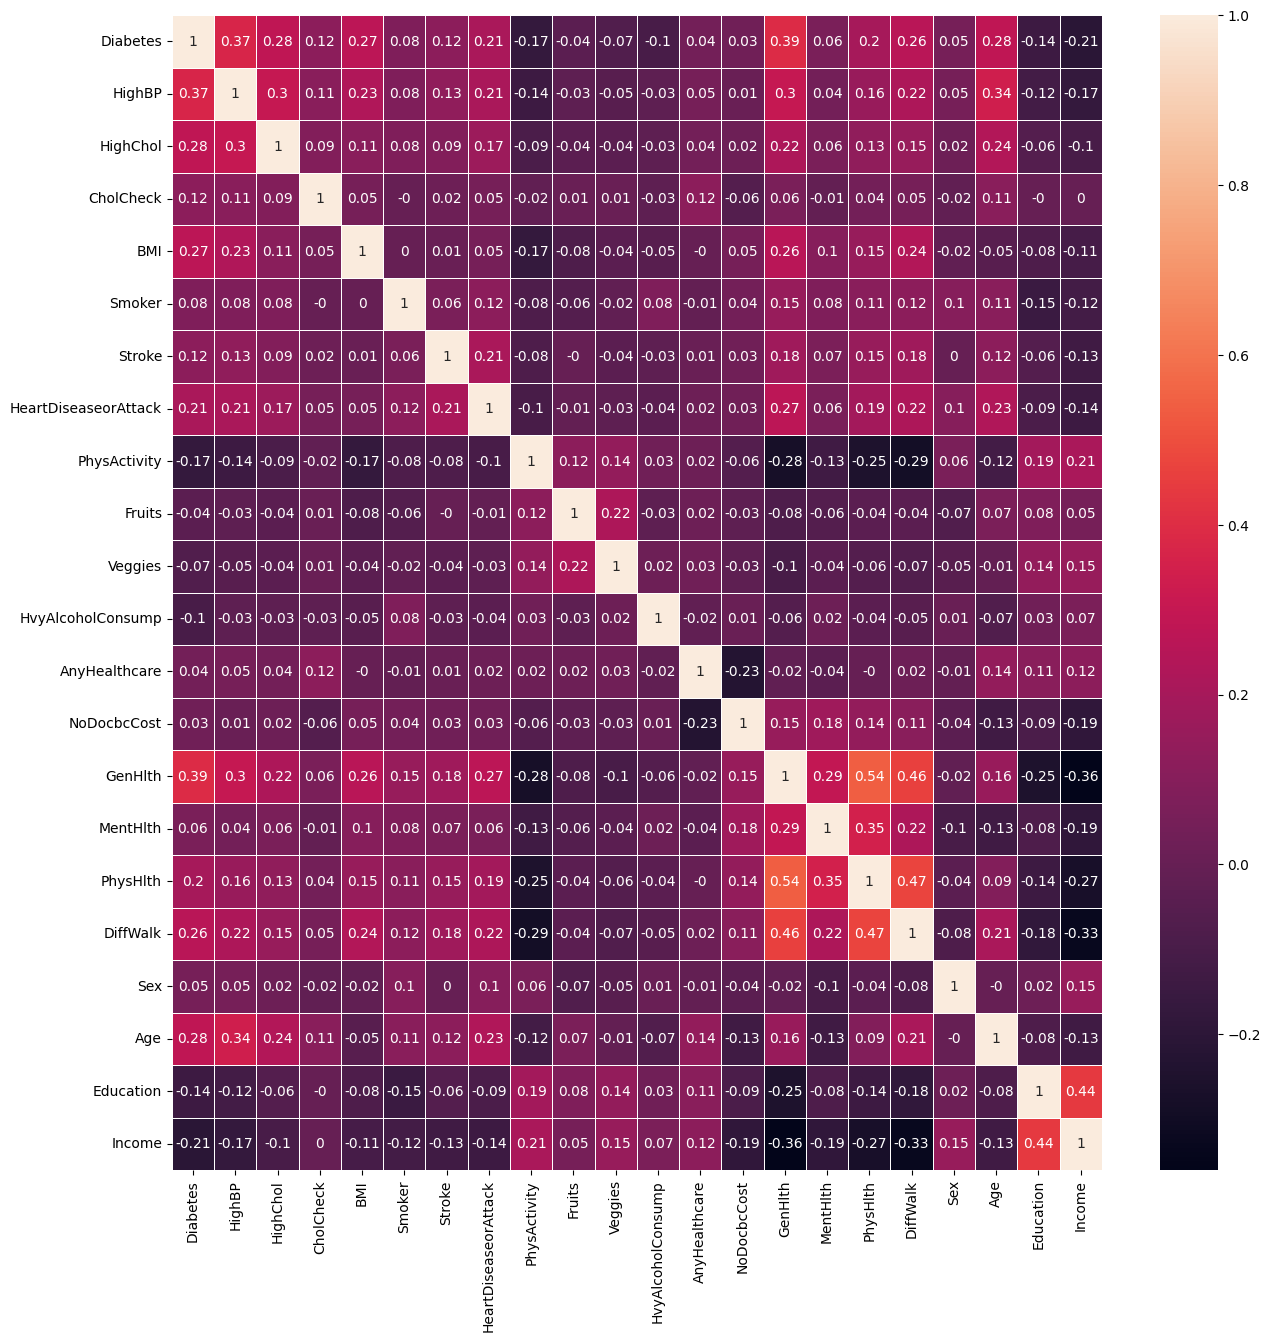

In [25]:
correlation_matrix = df_brfss.corr().round(2)
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)


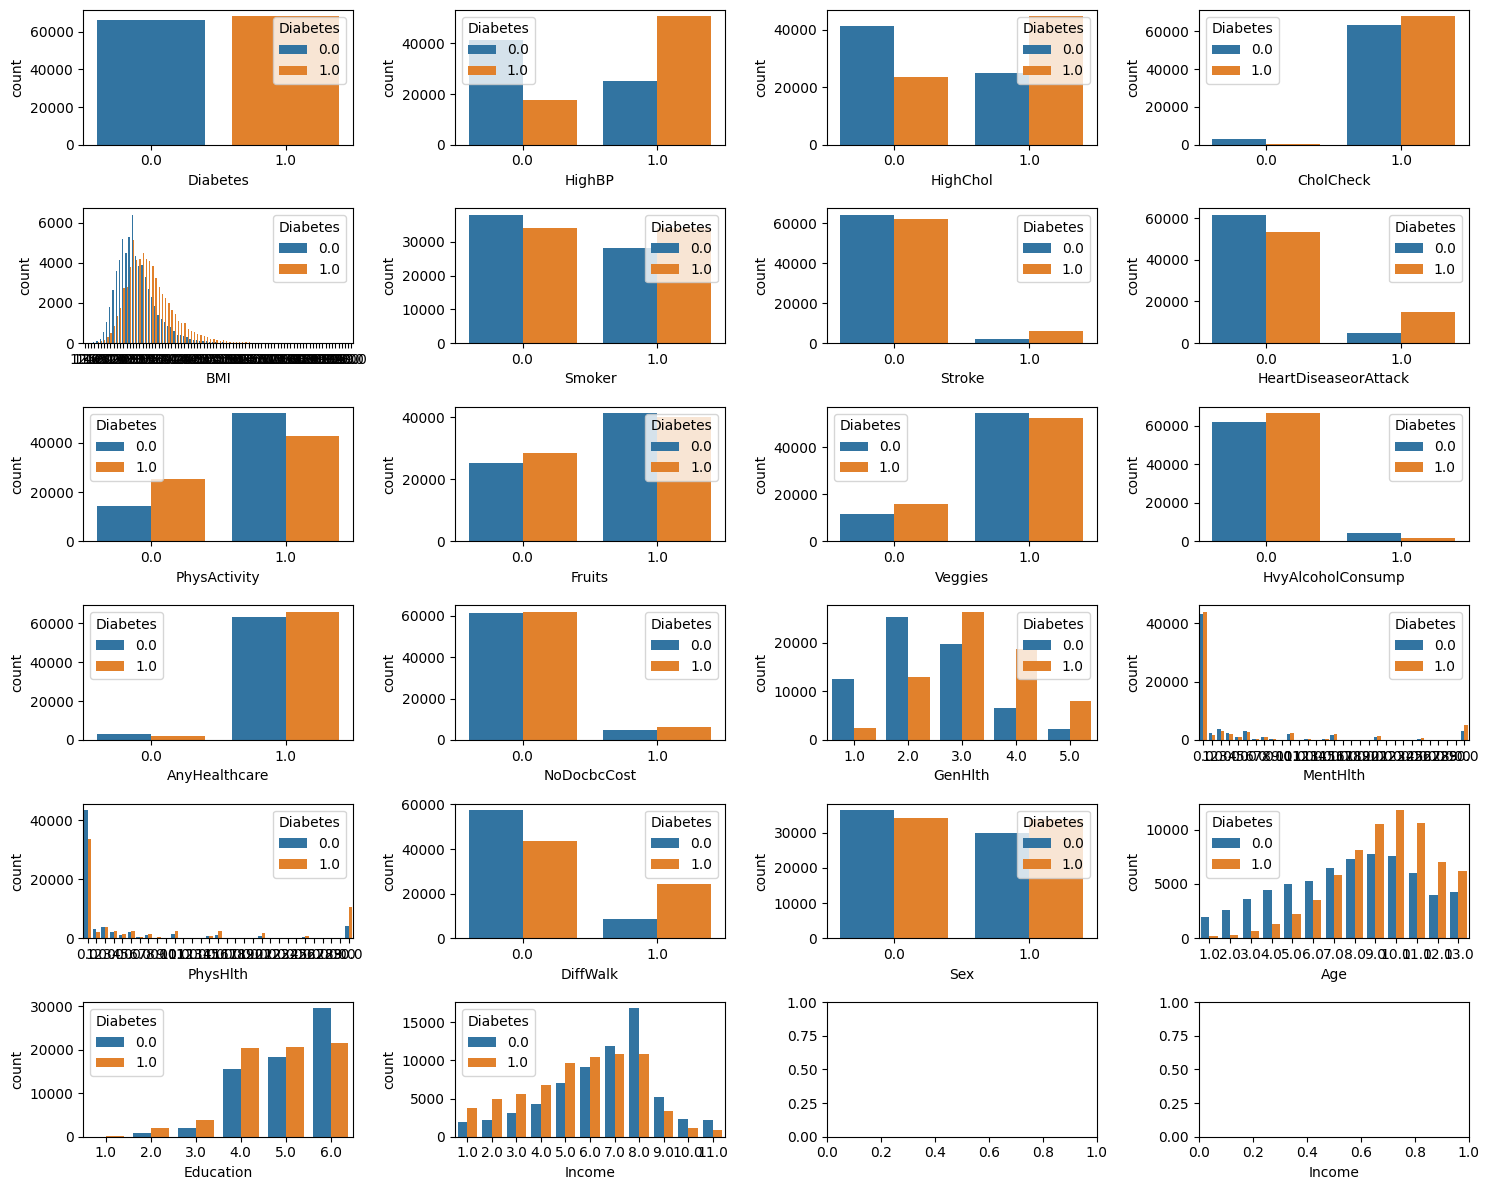

In [26]:
figure,axes=plt.subplots(nrows=6, ncols=4, figsize=(15, 12))
axes=axes.flatten()
axes_counter=0
for col_name in df_brfss.columns:
    sns.countplot(data=df_brfss, x=col_name, ax=axes[axes_counter], hue='Diabetes')
    plt.xlabel(col_name)
    axes_counter+=1
plt.tight_layout()
plt.show()

Classification to check if we can predict lifestyle factors effect on Diabetes

In [27]:
#sns.pairplot(df_brfss)

In [28]:
#Dropping columns: 'Stroke','CholCheck', 'AnyHealthcare' because there is very low variance in these values
print(df_brfss.var())
col=['Stroke','CholCheck', 'AnyHealthcare', 'NoDocbcCost', 'HvyAlcoholConsump']
#df_brfss=df_brfss.drop(col,axis=1)

Diabetes                 0.249951
HighBP                   0.246093
HighChol                 0.249684
CholCheck                0.024108
BMI                     51.042733
Smoker                   0.248718
Stroke                   0.058180
HeartDiseaseorAttack     0.124258
PhysActivity             0.208612
Fruits                   0.239464
Veggies                  0.162968
HvyAlcoholConsump        0.044602
AnyHealthcare            0.038385
NoDocbcCost              0.075714
GenHlth                  1.190152
MentHlth                69.172426
PhysHlth                98.468205
DiffWalk                 0.186491
Sex                      0.249340
Age                      8.652523
Education                1.018426
Income                   5.504550
dtype: float64


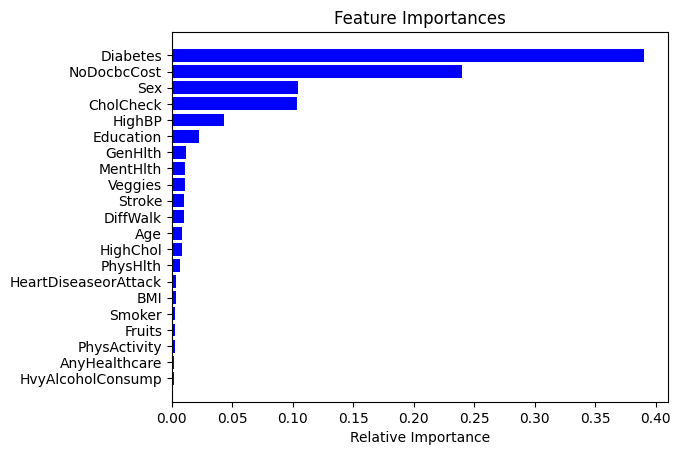

'\nclf = Pipeline([\n  (\'feature_selection\', SelectFromModel(LinearSVC(dual="auto", penalty="l1"))),\n  (\'classification\', RandomForestClassifier())\n])\nclf.fit(X, y)\n'

In [29]:
# Feature selection based on importance
from sklearn.ensemble import RandomForestRegressor

x= df_brfss.drop('Diabetes', axis=1)
y= df_brfss["Diabetes"]

rfr_model = RandomForestRegressor(random_state=1, max_depth=10)
df=pd.get_dummies(df_brfss)
rfr_model.fit(x, y)

features = df.columns
importances = rfr_model.feature_importances_
indices = np.argsort(importances)[-30:]  # top 10 features

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

'''
clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(dual="auto", penalty="l1"))),
  ('classification', RandomForestClassifier())
])
clf.fit(X, y)
'''

## Exeuction
### RandomForestClassifier

Use RandomForestClassifier to tain the model.

#### Results on unbalanced data

                    Predicted Healthy  Predicted PreDiabetic  Predicted Diabetes
    Not Diabetic             104945                    178                4601
    PreDiabetic                2668                      0                 345
    Diabetic                  16324                     35                3982
                   
                   
         precision    recall  f1-score   support

         0.0       0.85      0.96      0.90    109724
         1.0       0.00      0.00      0.00      3013
         2.0       0.45      0.20      0.27     20341

    accuracy                           0.82    133078
    macro avg       0.43      0.38      0.39    133078
    weighted avg       0.77      0.82      0.78    133078

#### Results on balanced data

                  Predicted Healthy  Predicted Diabetes
    Not Diabetic              13501                6441
    Diabetic                   4677               15748
                  precision    recall  f1-score   support

                 0.0       0.74      0.68      0.71     19942
                 1.0       0.71      0.77      0.74     20425

    accuracy                           0.72     40367
    macro avg       0.73      0.72      0.72     40367
    weighted avg       0.73      0.72      0.72     40367
  

              Predicted Healthy  Predicted Diabetes
Not Diabetic              13501                6441
Diabetic                   4677               15748
              precision    recall  f1-score   support

         0.0       0.74      0.68      0.71     19942
         1.0       0.71      0.77      0.74     20425

    accuracy                           0.72     40367
   macro avg       0.73      0.72      0.72     40367
weighted avg       0.73      0.72      0.72     40367



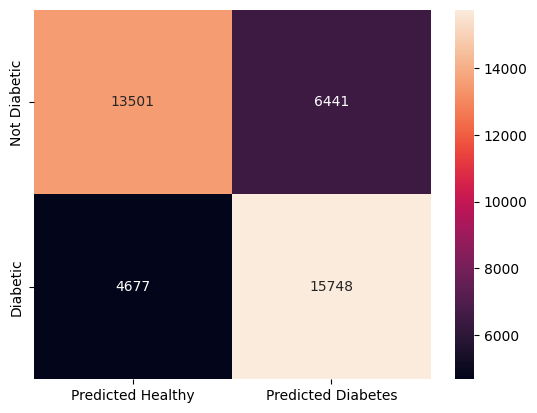

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

col=['AnyHealthcare']
x_with_reduced_col=df_brfss.drop(col,axis=1)
x= x_with_reduced_col.drop('Diabetes', axis=1)
y= df_brfss["Diabetes"]


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=50)
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


model = RandomForestClassifier()
model.fit(x_train, y_train)


y_predict = model.predict(x_test)


cm = np.array(confusion_matrix(y_test, y_predict, labels=[0, 1]))
confusion = pd.DataFrame(cm, index=['Not Diabetic', 'Diabetic'], columns=['Predicted Healthy', 'Predicted Diabetes'])
#cm = np.array(confusion_matrix(y_test, y_predict, labels=[0, 1 , 2]))
#confusion = pd.DataFrame(cm, index=['Not Diabetic', 'PreDiabetic', 'Diabetic'], columns=['Predicted Healthy', 'Predicted PreDiabetic', 'Predicted Diabetes'])

print(confusion)
sns.heatmap(confusion,annot=True,fmt='g')
print(classification_report(y_test, y_predict))

#### Drop 1 feature a time and check which one has best precision

##### Results on unbalanced data

```
{'accuracy': 0.818760426216204, 'feature': 'CholCheck'}
{'HighBP': 0.816198019206781, 'HighChol': 0.8134778100061618, 'CholCheck': 0.818760426216204, 'BMI': 0.8086385428094801, 'Smoker': 0.816926915042306, 'Stroke': 0.8182419333022739, 'HeartDiseaseorAttack': 0.8175130374667489, 'PhysActivity': 0.8168592855317934, 'Fruits': 0.8166263394400276, 'Veggies': 0.8175430950269766, 'HvyAlcoholConsump': 0.8181818181818182, 'AnyHealthcare': 0.818587595244894, 'NoDocbcCost': 0.81857256646478, 'GenHlth': 0.8132298351342822, 'MentHlth': 0.8165286523692872, 'PhysHlth': 0.815469123371256, 'DiffWalk': 0.8176933828281159, 'Sex': 0.8161153609161544, 'Age': 0.8132598926945099, 'Education': 0.8147627707059018, 'Income': 0.8141841626715159}
{'accuracy': 0.8188205413366597, 'feature': 'NoDocbcCost'}
{'HighBP': 0.8154465802010851, 'HighChol': 0.8141390763311742, 'BMI': 0.8084206254978283, 'Smoker': 0.8164685372488315, 'Stroke': 0.8181367318414764, 'HeartDiseaseorAttack': 0.8170396308931605, 'PhysActivity': 0.8168743143119073, 'Fruits': 0.8160777889658697, 'Veggies': 0.8175280662468627, 'HvyAlcoholConsump': 0.817858699409369, 'AnyHealthcare': 0.8186026240250079, 'NoDocbcCost': 0.8188205413366597, 'GenHlth': 0.8129518027021747, 'MentHlth': 0.8164685372488315, 'PhysHlth': 0.8155066953215407, 'DiffWalk': 0.8179338433099386, 'Sex': 0.8154165226408573, 'Age': 0.8137708712183832, 'Education': 0.8146876268053322, 'Income': 0.8141015043808894}
{'accuracy': 0.8178962713596537, 'feature': 'HvyAlcoholConsump'}
{'HighBP': 0.8154390658110281, 'HighChol': 0.8137558424382693, 'BMI': 0.8083154240370309, 'Smoker': 0.8160777889658697, 'Stroke': 0.8174303791761223, 'HeartDiseaseorAttack': 0.8168818287019642, 'PhysActivity': 0.8160627601857557, 'Fruits': 0.8155442672718255, 'Veggies': 0.8167089977306542, 'HvyAlcoholConsump': 0.8178962713596537, 'AnyHealthcare': 0.8176182389275463, 'GenHlth': 0.8122003636964787, 'MentHlth': 0.8152211484993763, 'PhysHlth': 0.8148304002164144, 'DiffWalk': 0.8171222891837869, 'Sex': 0.8155367528817686, 'Age': 0.8127188566104089, 'Education': 0.8138385007288959, 'Income': 0.8133049790348518}
{'accuracy': 0.8175506094170336, 'feature': 'Stroke'}
{'HighBP': 0.8146801124152753, 'HighChol': 0.8133500653751935, 'BMI': 0.8067073445648417, 'Smoker': 0.8154916665414268, 'Stroke': 0.8175506094170336, 'HeartDiseaseorAttack': 0.8160928177459835, 'PhysActivity': 0.8148905153368701, 'Fruits': 0.815093403868408, 'Veggies': 0.8158899292144457, 'AnyHealthcare': 0.8168968574820782, 'GenHlth': 0.8122153924765927, 'MentHlth': 0.8148379146064714, 'PhysHlth': 0.8136356121973579, 'DiffWalk': 0.8164910804190024, 'Sex': 0.8146049685147057, 'Age': 0.8117720434632321, 'Education': 0.8141465907212312, 'Income': 0.8127188566104089}
{'accuracy': 0.8166338538300846, 'feature': 'AnyHealthcare'}
{'HighBP': 0.814356993642826, 'HighChol': 0.8124483385683584, 'BMI': 0.8062189092111394, 'Smoker': 0.8149806880175536, 'HeartDiseaseorAttack': 0.8153639219104585, 'PhysActivity': 0.8144922526638513, 'Fruits': 0.8142593065720856, 'Veggies': 0.8153564075204016, 'AnyHealthcare': 0.8166338538300846, 'GenHlth': 0.8113963239603841, 'MentHlth': 0.8143344504726552, 'PhysHlth': 0.8128541156314342, 'DiffWalk': 0.8159350155547874, 'Sex': 0.8139361877996363, 'Age': 0.8111483490885045, 'Education': 0.8125610544192128, 'Income': 0.811989960774884}
['Diabetes', 'CholCheck', 'NoDocbcCost', 'HvyAlcoholConsump', 'Stroke', 'AnyHealthcare']
```

##### Results on balanced data


```
{'accuracy': 0.726187232145069, 'feature': 'AnyHealthcare'}
{'HighBP': 0.7210840538063269, 'HighChol': 0.7211088265167092, 'CholCheck': 0.7251467783090148, 'BMI': 0.7079792900141204, 'Smoker': 0.7231649614784353, 'Stroke': 0.7250476874674858, 'HeartDiseaseorAttack': 0.7239081427899027, 'PhysActivity': 0.7247008695221344, 'Fruits': 0.721901553248941, 'Veggies': 0.7245770059702232, 'HvyAlcoholConsump': 0.7247256422325167, 'AnyHealthcare': 0.726187232145069, 'NoDocbcCost': 0.7256174598062775, 'GenHlth': 0.7066911090742438, 'MentHlth': 0.7230658706369064, 'PhysHlth': 0.7232145068991999, 'DiffWalk': 0.7247751876532812, 'Sex': 0.7240072336314316, 'Age': 0.7133797408774494, 'Education': 0.7235860975549335, 'Income': 0.7203656452052419}
{'accuracy': 0.7263606411177447, 'feature': 'DiffWalk'}
{'HighBP': 0.7210345083855625, 'HighChol': 0.7201179181014195, 'CholCheck': 0.7244531424183119, 'BMI': 0.7061213367354522, 'Smoker': 0.7231154160576708, 'Stroke': 0.7248742784948101, 'HeartDiseaseorAttack': 0.7232392796095821, 'PhysActivity': 0.7251467783090148, 'Fruits': 0.7212079173582382, 'Veggies': 0.7238338246587559, 'HvyAlcoholConsump': 0.7240320063418139, 'NoDocbcCost': 0.7252210964401615, 'GenHlth': 0.7064681546808036, 'MentHlth': 0.7216290534347363, 'PhysHlth': 0.7227685981123194, 'DiffWalk': 0.7263606411177447, 'Sex': 0.7223226893254391, 'Age': 0.7111501969430475, 'Education': 0.7225456437188793, 'Income': 0.7198206455768326}
{'accuracy': 0.7245026878390765, 'feature': 'NoDocbcCost'}
{'HighBP': 0.7189783734238363, 'HighChol': 0.7184333737954269, 'CholCheck': 0.7234870067134045, 'BMI': 0.7030990660688186, 'Smoker': 0.7223474620358213, 'Stroke': 0.7235613248445513, 'HeartDiseaseorAttack': 0.7223474620358213, 'PhysActivity': 0.7232392796095821, 'Fruits': 0.7219263259593232, 'Veggies': 0.7221988257735279, 'HvyAlcoholConsump': 0.722719052691555, 'NoDocbcCost': 0.7245026878390765, 'GenHlth': 0.7063442911288924, 'MentHlth': 0.7221245076423811, 'PhysHlth': 0.7204151906260063, 'Sex': 0.7205638268882999, 'Age': 0.7095895161889663, 'Education': 0.7210592810959447, 'Income': 0.7190031461342186}
{'accuracy': 0.7236851883964625, 'feature': 'Stroke'}
{'HighBP': 0.7176158743528129, 'HighChol': 0.7191765551068943, 'CholCheck': 0.7224465528773503, 'BMI': 0.7042138380360196, 'Smoker': 0.7213565536205316, 'Stroke': 0.7236851883964625, 'HeartDiseaseorAttack': 0.7220997349319989, 'PhysActivity': 0.7231649614784353, 'Fruits': 0.7195976911833923, 'Veggies': 0.7222235984839102, 'HvyAlcoholConsump': 0.7203656452052419, 'GenHlth': 0.7036688384076102, 'MentHlth': 0.7200435999702728, 'PhysHlth': 0.7209354175440335, 'Sex': 0.720984962964798, 'Age': 0.7062699729977456, 'Education': 0.7198949637079793, 'Income': 0.7171947382763149}
{'accuracy': 0.7226447345604082, 'feature': 'Veggies'}
{'HighBP': 0.7170461020140213, 'HighChol': 0.7177149651943419, 'CholCheck': 0.7210345083855625, 'BMI': 0.7013897490524438, 'Smoker': 0.7211831446478559, 'HeartDiseaseorAttack': 0.7204151906260063, 'PhysActivity': 0.7218767805385587, 'Fruits': 0.7201922362325662, 'Veggies': 0.7226447345604082, 'HvyAlcoholConsump': 0.7219758713800877, 'GenHlth': 0.7041890653256373, 'MentHlth': 0.72078678128174, 'PhysHlth': 0.719969281839126, 'Sex': 0.7220749622216167, 'Age': 0.7085242896425298, 'Education': 0.7184086010850447, 'Income': 0.7181608739812223}
['Diabetes', 'AnyHealthcare', 'DiffWalk', 'NoDocbcCost', 'Stroke', 'Veggies']
```


In [31]:
def diabetes_classifier(df, features_to_drop):
    x= df.drop(features_to_drop, axis=1)
    y= df["Diabetes"]


    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=50)
    scaler = StandardScaler().fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)


    model = RandomForestClassifier()
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)

    report = classification_report(y_test, y_predict, target_names=['Not Diabetic', 'Diabetic'], output_dict=True)
    #report = classification_report(y_test, y_predict, target_names=['Not Diabetic', 'PreDiabetic', 'Diabetic'], output_dict=True)
    return report['accuracy']


cols_to_drop_from_train = ['Diabetes']
# Finding 5 columns to exclude from dataset to improve classifier performance
for x in range(0, 5):
    result = {};
    max_accuracy_after_dropping = { "accuracy" : -1, "feature": "none"};
    for col in df_brfss.columns:
        if col in cols_to_drop_from_train:
            continue
        acc = diabetes_classifier(df_brfss,  [*[col], *cols_to_drop_from_train])
        result[col] = acc
        if (acc > max_accuracy_after_dropping["accuracy"]):
            max_accuracy_after_dropping = { "accuracy" : acc, "feature": col}

    print(max_accuracy_after_dropping)
    print(result)
    cols_to_drop_from_train.append(max_accuracy_after_dropping["feature"])

print(cols_to_drop_from_train)


{'accuracy': 0.7258651869100998, 'feature': 'Stroke'}
{'HighBP': 0.7218767805385587, 'HighChol': 0.7214060990412962, 'CholCheck': 0.7242301880248718, 'BMI': 0.7078801991725915, 'Smoker': 0.723734733817227, 'Stroke': 0.7258651869100998, 'HeartDiseaseorAttack': 0.7258651869100998, 'PhysActivity': 0.725270641860926, 'Fruits': 0.7231897341888176, 'Veggies': 0.7239824609210493, 'HvyAlcoholConsump': 0.7236851883964625, 'AnyHealthcare': 0.7253945054128372, 'NoDocbcCost': 0.7247008695221344, 'GenHlth': 0.7066911090742438, 'MentHlth': 0.7240072336314316, 'PhysHlth': 0.7234374612926401, 'DiffWalk': 0.7253201872816905, 'Sex': 0.7247008695221344, 'Age': 0.7133549681670671, 'Education': 0.7247008695221344, 'Income': 0.7195233730522457}
{'accuracy': 0.7255431416751307, 'feature': 'NoDocbcCost'}
{'HighBP': 0.7198949637079793, 'HighChol': 0.720167463522184, 'CholCheck': 0.7239576882106671, 'BMI': 0.7040404290633439, 'Smoker': 0.7202913270740952, 'HeartDiseaseorAttack': 0.7240072336314316, 'PhysActivit

## Forward Feature Selection

Now, we will do forward feature selection to select the features to train the model.

In [32]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

x= df_brfss.drop('Diabetes', axis=1)
y= df_brfss["Diabetes"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=50)

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

model = RandomForestClassifier()

sfs = SequentialFeatureSelector(model, n_features_to_select = 12)
sfs.fit(x_train, y_train)

x_train_reduced = sfs.transform(x_train)
print(list(x_train_reduced))


TypeError: Singleton array array(4) cannot be considered a valid collection.